In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("Airpassengers.csv")
data.head(7)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


In [3]:
data.rename(columns = {"#Passengers" : "passengers"}, inplace = True)
data = data["passengers"]
data.head(7)

0    112
1    118
2    132
3    129
4    121
5    135
6    148
Name: passengers, dtype: int64

In [4]:
type(data)

pandas.core.series.Series

In [5]:
data =np.array(data).reshape(-1,1)

In [6]:
type(data) #2D numpy array

numpy.ndarray

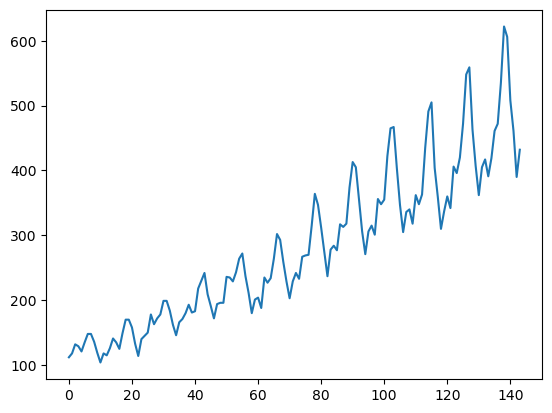

In [7]:
plt.plot(data)

In [8]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
len(data)

144

#### 144 veri - 100 tanesi train , 44 tanesi test olsun

In [10]:
train = data[0:100,:]
test = data[100:,:]

In [19]:
def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
steps = 2

In [21]:
x_train, y_train = get_data(train, steps)
x_test, y_test = get_data(test, steps)

In [22]:
# I reshaping my sets for using in LSTM model
x_train = np.reshape(x_train, (x_train.shape[0],1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x_test.shape[1]))

In [23]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps)))
model.add(Dense(64))
model.add(Dense(1))

In [24]:
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67072     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75393 (294.50 KB)
Trainable params: 75393 (294.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, epochs = 25, batch_size = 1)

Epoch 1/25
97/97 [==============================] - 6s 8ms/step - loss: 0.0072
Epoch 2/25
97/97 [==============================] - 1s 8ms/step - loss: 0.0037
Epoch 3/25
97/97 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 4/25
97/97 [==============================] - 1s 8ms/step - loss: 0.0034
Epoch 5/25
97/97 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 6/25
97/97 [==============================] - 1s 7ms/step - loss: 0.0031
Epoch 7/25
97/97 [==============================] - 1s 8ms/step - loss: 0.0034
Epoch 8/25
97/97 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 9/25
97/97 [==============================] - 1s 8ms/step - loss: 0.0032
Epoch 10/25
97/97 [==============================] - 1s 7ms/step - loss: 0.0031
Epoch 11/25
97/97 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 12/25
97/97 [==============================] - 1s 6ms/step - loss: 0.0026
Epoch 13/25
97/97 [==============================

In [27]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 8ms/step


In [28]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

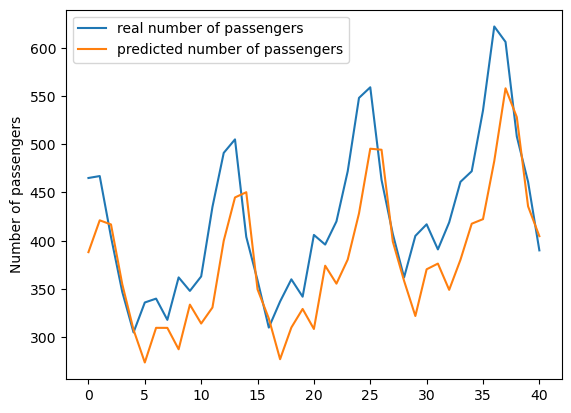

In [29]:
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()